<a href="https://colab.research.google.com/github/Miru-s/Sentiment-Analysis-/blob/main/Aspect_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2afbf64710>]],
      dtype=object)

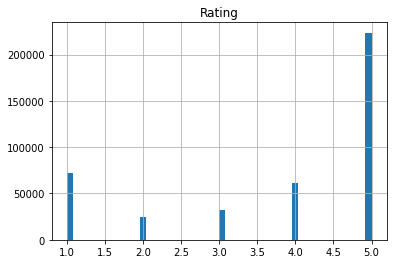

In [ ]:
%matplotlib inline
df.hist(column='Rating', bins=50)

In [ ]:
df_good_bad = df[(df.Rating==5) | (df.Rating==1)]
X = df_good_bad.Reviews
y = df_good_bad.Rating

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
X_train_dtm = vect.fit_transform(X_train.astype("U"))
X_test_dtm = vect.transform(X_test.astype("U"))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9518306775331469

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[15971,  2098],
       [ 1466, 54454]])

In [ ]:
X_test[y_test < y_pred_class].head(10)

2253      So I am usually not rushing to write reviews, ...
385199    At first was OK, a very basic phone and didn't...
346815    Phone has a locked bootloader so phone is full...
183920                                   CAN'T EAR ANYTHING
136321                                              No good
409607    I hate the picture quality! I assumed with it ...
320625    Omg it's NOT a NEW PHONE!! I has found lots of...
126251    Very nice phone, specially for the initial $79...
10107     Not happy it said for straight talk and it was...
173708                       an experience i want to forget
Name: Reviews, dtype: object

In [ ]:
X_test[y_test > y_pred_class].head(5) #Good reviews classified as Bad reviews (errors)

4438      Its an iPad. That should sum up the product it...
107947    Assume phone. No problem with it. Had charging...
215584    LG g2 awesome phone! Broke my iPhone and got t...
273709    Most of the apps are ok. However I stopped usi...
359125    Excellent product!!I am pleased with product, ...
Name: Reviews, dtype: object

In [ ]:
#Finding the word that has highest frequency in good and bad reviews
X_train_word = vect.get_feature_names()
bad_review_word_count = nb.feature_count_[0, :]
good_review_word_count = nb.feature_count_[1, :]

In [ ]:
#Finding the word that has highest frequency in good and bad reviews
X_train_word = vect.get_feature_names()
bad_review_word_count = nb.feature_count_[0, :]
good_review_word_count = nb.feature_count_[1, :]
words = pd.DataFrame({'word':X_train_word, 'bad_review':bad_review_word_count, 'good_review':good_review_word_count}).set_index('word')

In [ ]:
#Calculate frequency of word counts
words['bad_review'] = (words.bad_review + 1)/ nb.class_count_[0]
words['good_review'] = (words.good_review + 1)/ nb.class_count_[1]
words['good_bad_ratio'] = words.good_review / words.bad_review

In [ ]:
words.sort_values('good_bad_ratio', ascending=False).head(10) #positive words

,bad_review,good_review,good_bad_ratio
word,,,
excelente,0.000184,0.035441,192.379750
excelent,0.000166,0.018040,108.801904
exelent,0.000018,0.001485,80.603328
exelente,0.000055,0.004139,74.884484
phenomenal,0.000018,0.001252,67.978710
loves,0.000368,0.023759,64.482662
exellent,0.000018,0.000966,52.440719
exceeds,0.000018,0.000942,51.145887
sexy,0.000018,0.000739,40.139810


In [ ]:
words.sort_values('good_bad_ratio', ascending=True).head(10)  #negative words

,bad_review,good_review,good_bad_ratio
word,,,
mal,0.001382,0.000006,0.004316
scammers,0.000774,0.000006,0.007707
cheated,0.004403,0.000036,0.008127
waisted,0.000718,0.000006,0.008300
recourse,0.000663,0.000006,0.008992
carga,0.000608,0.000006,0.009809
digitelllllllll,0.000571,0.000006,0.010442
estafa,0.000571,0.000006,0.010442
defectuoso,0.001069,0.000012,0.011162


In [ ]:
X = df.Reviews
y = df.Rating

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
X_train_dtm = vect.fit_transform(X_train.astype("U"))
X_test_dtm = vect.transform(X_test.astype("U"))

In [ ]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
metrics.accuracy_score(y_test, y_pred_class)

0.7187028803402281

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[14926,   426,   592,   447,  1658],
       [ 2927,  1135,   538,   569,  1013],
       [ 1941,   221,  2010,  1246,  2552],
       [ 1036,   149,   613,  4289,  9305],
       [ 1187,   115,   324,  2244, 51997]])

In [ ]:
#Accuracy based on precision, recall and f1-score
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.68      0.83      0.75     18049
           2       0.55      0.18      0.28      6182
           3       0.49      0.25      0.33      7970
           4       0.49      0.28      0.35     15392
           5       0.78      0.93      0.85     55867

    accuracy                           0.72    103460
   macro avg       0.60      0.49      0.51    103460
weighted avg       0.68      0.72      0.68    103460

